In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/acea-water-prediction/River_Arno.csv')


In [5]:
data=data.loc[:,['Date','Hydrometry_Nave_di_Rosano']]

In [6]:
data

,Date,Hydrometry_Nave_di_Rosano
0,01/01/1998,1.82
1,02/01/1998,1.94
2,03/01/1998,2.11
3,04/01/1998,1.84
4,05/01/1998,1.88
...,...,...
8212,26/06/2020,1.34
8213,27/06/2020,1.21
8214,28/06/2020,1.30
8215,29/06/2020,1.19


In [7]:
data.columns

Index(['Date', 'Hydrometry_Nave_di_Rosano'], dtype='object')

In [8]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)


In [9]:
data

,Date,Hydrometry_Nave_di_Rosano
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


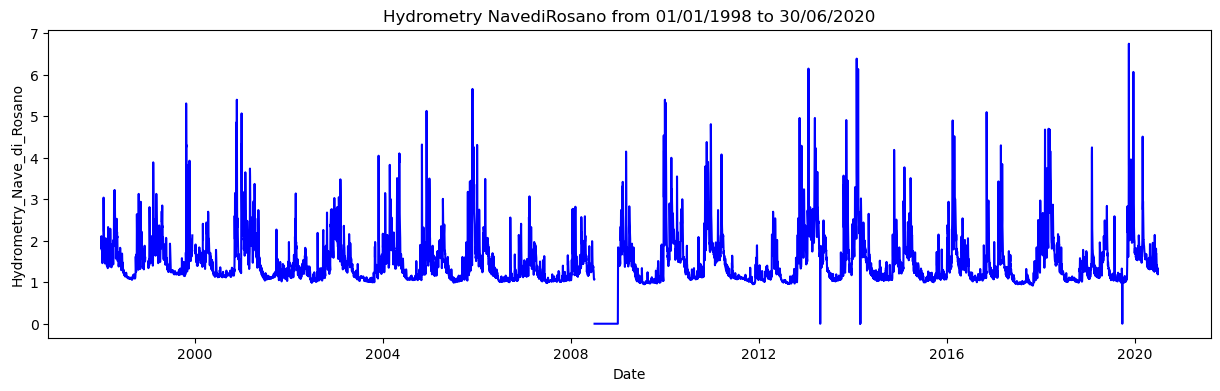

In [10]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Hydrometry_Nave_di_Rosano', dpi=100, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data['Date'], y=data['Hydrometry_Nave_di_Rosano'], title='Hydrometry NavediRosano from 01/01/1998 to 30/06/2020')

In [11]:
# data['year'] = data.Date.dt.year
# data['month'] = data.Date.dt.month
# data['day'] = data.Date.dt.day

In [25]:
data

,Hydrometry_Nave_di_Rosano
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [28]:
data.dropna(inplace=True)


In [29]:
data

,Hydrometry_Nave_di_Rosano
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [ ]:
train_data = data.loc[:'2020-05-31']
test_data = data.loc['2020-06-01':]


In [31]:


def optimize_ARIMA(parameters_list):
    best_aic = float("inf")
    best_params = None
    for param in parameters_list:
        try:
            model = SARIMAX(train_data, order=(param[0], param[1], param[2])).fit(disp=False)
        except:
            continue
        aic = model.aic
        if aic < best_aic:
            best_aic = aic
            best_params = param
    return best_params

# Tìm kiếm các tham số tốt nhất cho AR, MA, ARMA
def optimize_AR(parameters_list):
    best_aic = float("inf")
    best_lag = None
    for lag in parameters_list:
        model = AutoReg(train_data, lags=lag).fit()
        aic = model.aic
        if aic < best_aic:
            best_aic = aic
            best_lag = lag
    return best_lag

def optimize_MA(parameters_list):
    best_aic = float("inf")
    best_lag = None
    for lag in parameters_list:
        try:
            model = SARIMAX(train_data, order=(0, 0, lag)).fit(disp=False)
        except:
            continue
        aic = model.aic
        if aic < best_aic:
            best_aic = aic
            best_lag = lag
    return best_lag

def optimize_ARMA(parameters_list):
    best_aic = float("inf")
    best_params = None
    for p in parameters_list:
        for q in parameters_list:
            try:
                model = SARIMAX(train_data, order=(p, 0, q)).fit(disp=False)
            except:
                continue
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_params = (p, q)
    return best_params


In [32]:
arima_params = [(p, d, q) for p in range(3) for d in range(2) for q in range(3)]
arima_best_params = optimize_ARIMA(arima_params)
print("Best ARIMA Parameters:", arima_best_params)

ar_lags = range(1, 10)
ar_best_lag = optimize_AR(ar_lags)
print("Best AR Lag:", ar_best_lag)

ma_lags = range(1, 10)
ma_best_lag = optimize_MA(ma_lags)
print("Best MA Lag:", ma_best_lag)

arma_params = range(3)
arma_best_params = optimize_ARMA(arma_params)
print("Best ARMA Parameters:", arma_best_params)


Best ARIMA Parameters: (1, 1, 2)
Best AR Lag: 9
Best MA Lag: 9
Best ARMA Parameters: (2, 2)


In [ ]:

arima_model = SARIMAX(train_data, order=(arima_best_params[0], 1, arima_best_params[1]),
                      seasonal_order=(0, 0, 0, 0)).fit(disp=False)
ar_model = AutoReg(train_data, lags=ar_best_lag).fit()
ma_model = SARIMAX(train_data, order=(0, 0, ma_best_lag)).fit(disp=False)
arma_model = SARIMAX(train_data, order=(arma_best_params[0], 0, arma_best_params[1])).fit(disp=False)


In [33]:
arima_pred = arima_model.forecast(steps=len(test_data))
ar_pred = ar_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
ma_pred = ma_model.forecast(steps=len(test_data))
arma_pred = arma_model.forecast(steps=len(test_data))

In [34]:

arima_rmse = np.sqrt(mean_squared_error(test_data, arima_pred))
ar_rmse = np.sqrt(mean_squared_error(test_data, ar_pred))
ma_rmse = np.sqrt(mean_squared_error(test_data, ma_pred))
arma_rmse = np.sqrt(mean_squared_error(test_data, arma_pred))

print("RMSE for ARIMA:", arima_rmse)
print("RMSE for AR:", ar_rmse)
print("RMSE for MA:", ma_rmse)
print("RMSE for ARMA:", arma_rmse)


RMSE for ARIMA: 0.2059920698331465
RMSE for AR: 0.22021252437884323
RMSE for MA: 1.3898419202371763
RMSE for ARMA: 0.2627799172767214
